In [195]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import datasets
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

## Get Data

In [196]:
data = datasets.load_diabetes()

In [197]:
print(data['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [198]:
y = data['target']
X = pd.DataFrame(
    data['data'], 
    columns=['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6']
)
# this just converts sex back to a categorical variable
X.sex = X.sex.apply(lambda x: 1 if x > 0 else 0)
X = sm.add_constant(X)

In [199]:
X.head()

,const,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,1.0,0.038076,1,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,1.0,-0.001882,0,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,1.0,0.085299,1,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,1.0,-0.089063,0,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,1.0,0.005383,0,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


## VIF

In [202]:
max_vif = vifs.max()
max_vif_idx = np.where(vifs == max_vif)[0][0]
print(f"The max vif of {max_vif} is located at index {max_vif_idx}")

The max vif of 59.202510134318615 is located at index 5


In [203]:
pd.DataFrame(vifs.T, columns=['vif']).set_index(X.columns)

,vif
const,2.125790
age,1.217307
sex,1.278071
bmi,1.509437
bp,1.459428
s1,59.202510
s2,39.193370
s3,15.402156
s4,8.890986
s5,10.075967


Drop the variable with max VIF and continue

In [204]:
# get column name
name = X.columns[max_vif_idx]
# drop it
X.drop(name, axis=1, inplace=True)

In [205]:
vifs = np.array([vif(X, i) for i in range(X.shape[1])])
max_vif = vifs.max()
max_vif_idx = np.where(vifs == max_vif)[0][0]
print(f"The max vif of {max_vif} is located at index {max_vif_idx}")

The max vif of 7.818670164713724 is located at index 7


In [206]:
pd.DataFrame(vifs.T, columns=['vif']).set_index(X.columns)

,vif
const,2.123128
age,1.216892
sex,1.275049
bmi,1.502320
bp,1.457413
s2,2.926535
s3,3.736890
s4,7.818670
s5,2.172865
s6,1.484410


Drop the variable with max VIF and continue

In [207]:
# get column name
name = X.columns[max_vif_idx]
# drop it
X.drop(name, axis=1, inplace=True)

In [208]:
vifs = np.array([vif(X, i) for i in range(X.shape[1])])
max_vif = vifs.max()
max_vif_idx = np.where(vifs == max_vif)[0][0]
print(f"The max vif of {max_vif} is located at index {max_vif_idx}")

The max vif of 2.117982389400746 is located at index 0


In [209]:
pd.DataFrame(vifs.T, columns=['vif']).set_index(X.columns)

,vif
const,2.117982
age,1.216284
sex,1.269207
bmi,1.498559
bp,1.447358
s2,1.180838
s3,1.473827
s5,1.641090
s6,1.476913


## Fit Linear Model

In [153]:
model = sm.OLS(y, X)

In [154]:
fit = model.fit()

In [155]:
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     57.12
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           4.35e-63
Time:                        21:24:25   Log-Likelihood:                -2387.9
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     433   BIC:                             4831.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        162.5006      3.757     43.257      0.0

## Evaluate Model Fit

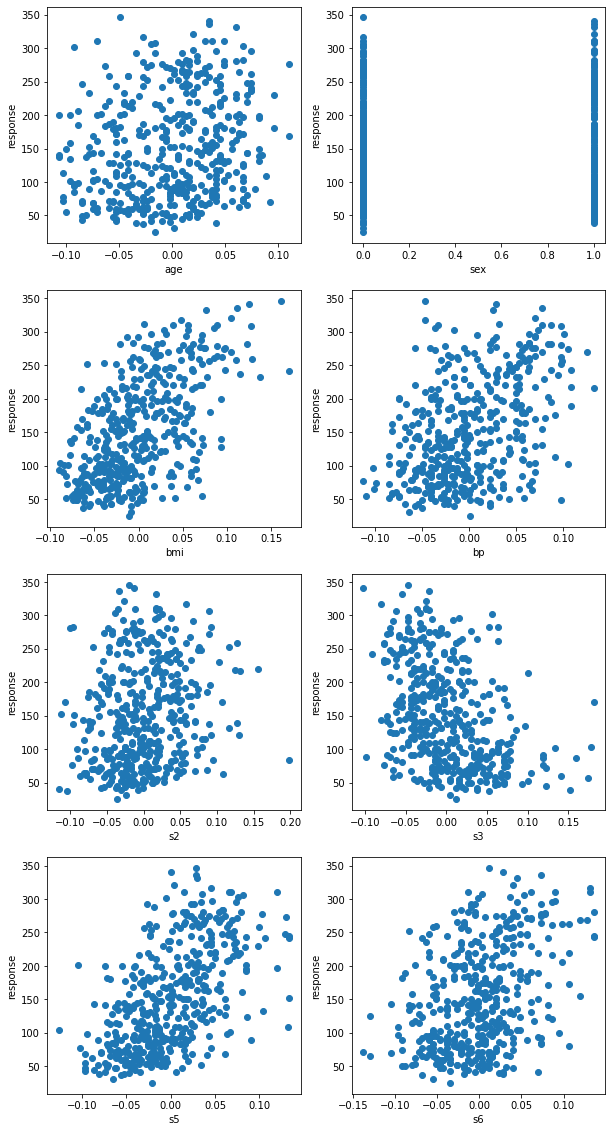

In [156]:
fig, ax = plt.subplots(4,2, figsize=(10,20))
for idx, col in enumerate(X.columns[1:]):
    ax[idx//2, idx%2].scatter(X[col], y)
    ax[idx//2, idx%2].set_xlabel(col)
    ax[idx//2, idx%2].set_ylabel('response')
fig.savefig('scatter_plots.png', dpi=300)

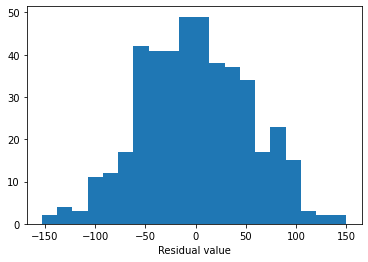

In [157]:
plt.hist(fit.resid, bins=20);
plt.xlabel('Residual value');
plt.savefig('residuals_hist.png', dpi=300);

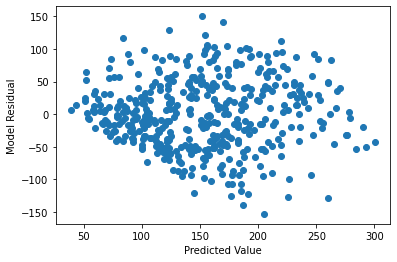

In [158]:
pred = fit.predict(X)
plt.scatter(pred, fit.resid)
plt.ylabel('Model Residual')
plt.xlabel('Predicted Value');
plt.savefig('residuals_scatter.png',dpi=300);

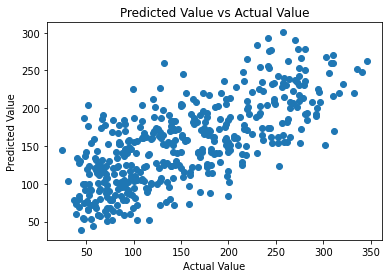

In [159]:
plt.scatter(y, pred)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Predicted Value vs Actual Value');
plt.savefig('predicted_actual_scatter.png', dpi=300);